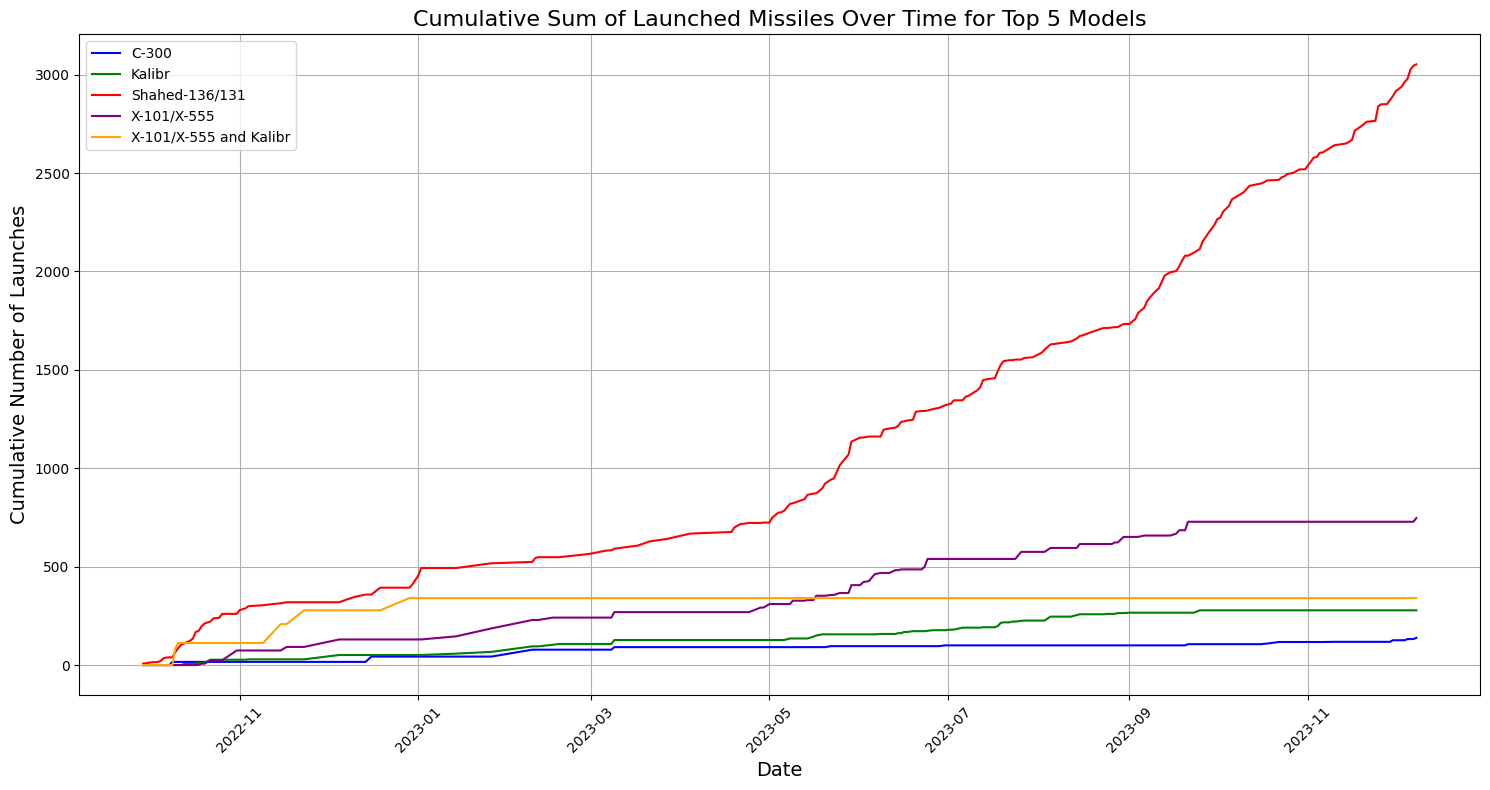

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file into a DataFrame
file_path1 = 'missile_attacks_daily.csv'
file_path2 = 'missiles_and_uav.csv'

with open(file_path1, 'r') as file1:
    missile_attacks_daily_df = pd.read_csv(file1)

with open(file_path2, 'r') as file2:
    missiles_and_uav_df = pd.read_csv(file2)
# Convert 'time_start' to datetime to extract the date component
missile_attacks_daily_df['time_start'] = pd.to_datetime(missile_attacks_daily_df['time_start']).dt.date

# Group by 'model' and sum the 'launched' variable for each model type
launches_sum_by_model = missile_attacks_daily_df.groupby('model', as_index=False)['launched'].sum()

# Identify the top 5 models by total number of launches
top_5_models = launches_sum_by_model.nlargest(5, 'launched')['model']

# Filter the dataset for only the top 5 models
top_5_data = missile_attacks_daily_df[missile_attacks_daily_df['model'].isin(top_5_models)]

# Group by model and date, then sum the launches
top_5_sum_over_time = top_5_data.groupby(['model', 'time_start'])['launched'].sum().reset_index()

# Pivot the data for better visualization
top_5_pivoted = top_5_sum_over_time.pivot(index='time_start', columns='model', values='launched').fillna(0)

# Calculate the cumulative sum of launches over time for each model
top_5_cumulative = top_5_pivoted.cumsum()

# Plotting the cumulative data without markers for a smoother line
plt.figure(figsize=(15, 8))

# Define a list of distinct colors for the lines
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Loop through the columns (models) to plot each one with a distinct color, without markers
for model, color in zip(top_5_cumulative.columns, colors):
    plt.plot(top_5_cumulative.index, top_5_cumulative[model], label=model, color=color, linestyle='-')  # Removed marker

plt.title('Cumulative Sum of Launched Missiles Over Time for Top 5 Models', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Number of Launches', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


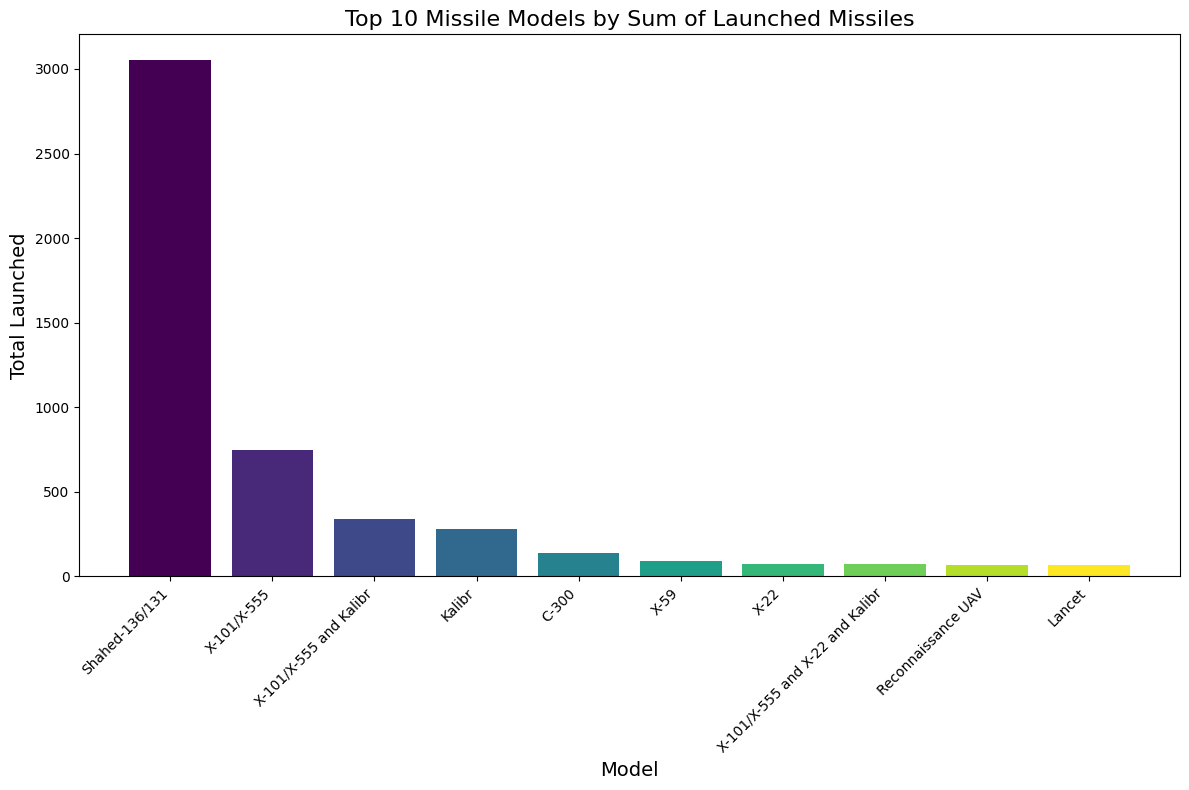

In [8]:
import numpy as np

# Filter to keep only the top 10 models by total launched
top_10_launches = launches_sum_sorted.head(10)

# Generate a list of colors for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_launches)))

# Plotting the top 10 models
plt.figure(figsize=(12, 8))
plt.bar(top_10_launches['model'], top_10_launches['launched'], color=colors)

plt.title('Top 10 Missile Models by Sum of Launched Missiles', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Total Launched', fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate model names for better readability and align right
plt.tight_layout()

# Show the plot
plt.show()



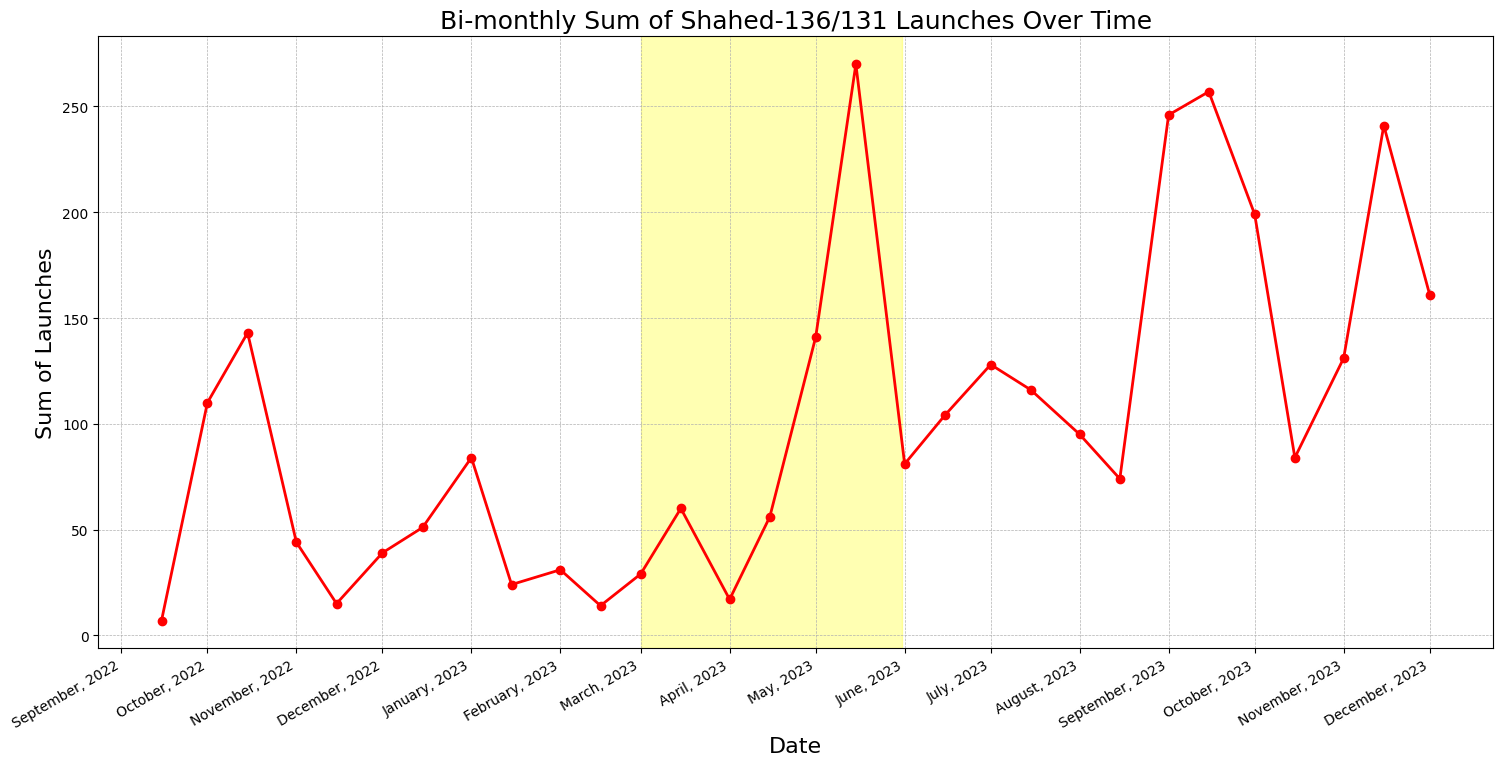

In [18]:

shahed_filtered = missile_attacks_daily_df[missile_attacks_daily_df['model'] == 'Shahed-136/131'].copy()
shahed_filtered['time_start'] = pd.to_datetime(shahed_filtered['time_start'])

# Resample to bi-monthly frequency and sum the launches
launches_resampled = shahed_filtered.set_index('time_start').resample('SMS')['launched'].sum().reset_index()

# Plotting
plt.figure(figsize=(18, 9))
plt.plot(launches_resampled['time_start'], launches_resampled['launched'], marker='o', linestyle='-', color='red', linewidth=2)

# Highlighting February 2023 to March 2023
highlight_start = pd.to_datetime('2023-03-01')
highlight_end = pd.to_datetime('2023-05-31')
plt.axvspan(highlight_start, highlight_end, color='yellow', alpha=0.3)

plt.title('Bi-monthly Sum of Shahed-136/131 Launches Over Time', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sum of Launches', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)

# Enhancing x-axis date formatting
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%B, %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().figure.autofmt_xdate()

# Show the final plot
plt.show()


